# Analyse des indicateurs à l'échelle du bâtiment

In [1]:
#install.packages('rpostgis', 'rgdal', 'magrittr', 'dbscan', 'corrplot')
library('rpostgis')
library('rgdal')
library('magrittr')
library('dbscan')
#library('corrplot')

Warning message:
"package 'rpostgis' was built under R version 3.4.4"Loading required package: RPostgreSQL
Loading required package: DBI
Loading required package: sp
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.0, released 2017/04/28
 Path to GDAL shared files: C:/R/libs/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/R/libs/rgdal/proj
 Linking to sp version: 1.2-5 
Warning message:
"package 'dbscan' was built under R version 3.4.4"

In [2]:
conn <- dbConnect("PostgreSQL", dbname = 'base_data', host = 'localhost', user = 'postgres', password = 'asd')

In [3]:
bd_scale_query <- "SELECT a.geom, a.id, b_perim, b_area, b_r_vol_fac, b_maxEdge, b_minEdge, b_stories, b_floorsqm,
c_Miller, c_Schumm, c_Haggett, c_LeeSallee, c_Ehrenb,
bb_perim, bb_area, bb_length, bb_width, bb_r_lw, bb_r_area, bb_r_perim,
cc_rad, cc_exch, cc_detour,
ch_area, ch_perim, ch_r_area, ch_r_perim,
s_deadend, sc_lines, sc_length, sc_orient, sc_l_sn, sc_l_ew, sc_l_nesw, sc_l_senw,
m_corndis, m_court, m_court_area, m_court_rel_a
FROM public.bd a,
     public.AGGLO b
WHERE ST_Intersects(a.geom, b.geom)
ORDER BY a.id;"

In [4]:
sub_in_query <- function(gid, agglo, query) {
    q <- gsub('GID', gid, query) %>%
         gsub('AGGLO', agglo, .)
    return(q)
}

In [9]:
bd_stata <- pgGetGeom(conn, query = sub_in_query(0, "stata", bd_scale_query))
row.names(bd_stata@data) <- bd_stata@data$id
bd_stata@data$id <- NULL 
bd_stata@data <- data.frame(scale(bd_stata@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [5]:
bd_statb <- pgGetGeom(conn, query = sub_in_query(0, "statb", bd_scale_query))
row.names(bd_statb@data) <- bd_statb@data$id
bd_statb@data$id <- NULL 
bd_statb@data <- data.frame(scale(bd_statb@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [22]:
bd_morf <- pgGetGeom(conn, query = sub_in_query(0, "morfrac", bd_scale_query))
row.names(bd_morf@data) <- bd_morf@data$id
bd_morf@data$id <- NULL 
bd_morf@data <- data.frame(scale(bd_morf@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [38]:
bd_ccak <- pgGetGeom(conn, query = sub_in_query(0, "cca_king", bd_scale_query))
row.names(bd_ccak@data) <- bd_ccak@data$id
bd_ccak@data$id <- NULL 
bd_ccak@data <- data.frame(scale(bd_ccak@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [5]:
bd_ccal <- pgGetGeom(conn, query = sub_in_query(0, "cca_lenient", bd_scale_query))
row.names(bd_ccal@data) <- bd_ccal@data$id
bd_ccal@data$id <- NULL 
bd_ccal@data <- data.frame(scale(bd_ccal@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [10]:
corr_plot <- function(dataset) {
    ds <- dataset
    
    corrplot(cor(ds), diag = FALSE, order = "alphabet",
         tl.pos = "td", tl.cex = 0.5, method = "color", type = "upper")
}

## Clustering

### StatA

#### DBSCAN

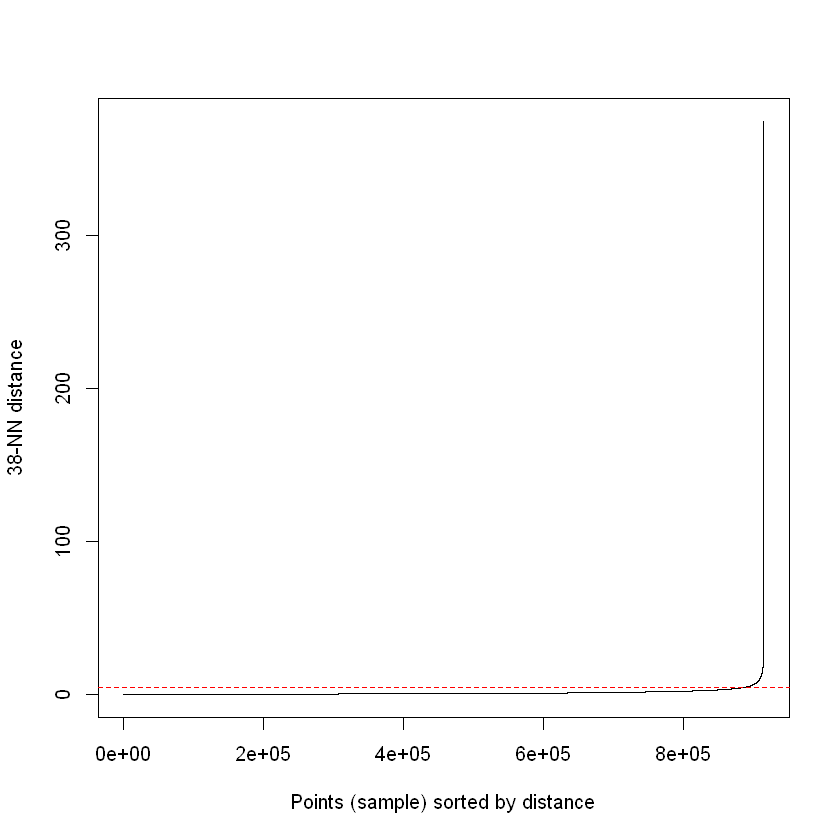

In [36]:
kNNdistplot(bd_stata@data, k = 38)
abline(h = 4.5, col = 'red', lty = 2)

In [80]:
res_stata <- dbscan(bd_stata@data, eps = 4.5, minPts = 39)
res_stata

DBSCAN clustering for 24094 objects.
Parameters: eps = 4.5, minPts = 39
The clustering contains 1 cluster(s) and 591 noise points.

    0     1 
  591 23503 

Available fields: cluster, eps, minPts

### K-Means

In [81]:
clusDBSCAN <- res_statb$cluster
bd_stata@data <- cbind(bd_stata@data, clusDBSCAN)

,b_perim,b_area,b_r_vol_fac,b_maxedge,b_minedge,b_stories,b_floorsqm,c_miller,c_schumm,c_haggett,...,sc_orient,sc_l_sn,sc_l_ew,sc_l_nesw,sc_l_senw,m_corndis,m_court,m_court_area,m_court_rel_a,clusDBSCAN
788,-0.07537265,-0.074296914,0.2829863,-0.13484271,1.3048680,1.9869483,0.06264296,0.6509711,0.70325512,0.8121289,...,-0.4839023,-0.2342095,-0.235430973,-0.2640124,-0.08757012,0.01675629,-0.02473744,-0.01736495,-0.02733673,1
789,-0.35176885,-0.221745494,-0.4679597,-0.57780252,0.2764865,-0.2217753,-0.18856720,0.6862447,0.75636751,1.1019807,...,-0.4839023,-0.2342095,-0.235430973,-0.2640124,-0.26056997,-0.50585916,-0.02473744,-0.01736495,-0.02733673,1
790,4.67861849,2.056661797,1.1058453,4.12600041,-1.5725550,2.5391292,2.86826480,-4.5689051,-2.10366350,-2.8538222,...,2.7631663,0.2638861,-0.004673999,6.0321956,9.81469410,3.44141980,-0.02473744,-0.01736495,-0.02733673,0
791,-0.04332671,-0.072407701,0.2137572,0.13457839,0.6657896,0.8825865,-0.02561534,0.2329006,0.05710889,-0.2740578,...,-0.4839023,-0.2342095,-0.235430973,-0.2640124,0.47238663,0.12942054,-0.02473744,-0.01736495,-0.02733673,1
792,1.32757961,0.751011121,1.5325861,1.99914454,-0.3358358,4.7478529,1.89093245,-2.0983955,-1.73162801,-2.7048227,...,1.6808101,-0.2342095,0.477688821,1.5878870,1.81754858,1.90978072,-0.02473744,-0.01736495,-0.02733673,1
793,0.02877664,-0.002089719,0.5836982,-0.05296434,1.9594543,1.9869483,0.14449635,0.6865568,0.74453276,1.1060653,...,-0.4839023,-0.2342095,-0.235430973,-0.1911207,-0.30442394,0.20778318,-0.02473744,-0.01736495,-0.02733673,1


In [99]:
sel <- bd_stata@data$clusDBSCAN == 1
bd_stata_to_class <- bd_stata[sel,]

In [85]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(bd_stata_to_class@data[,c(-31:-34,-36:-39)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1175150)"

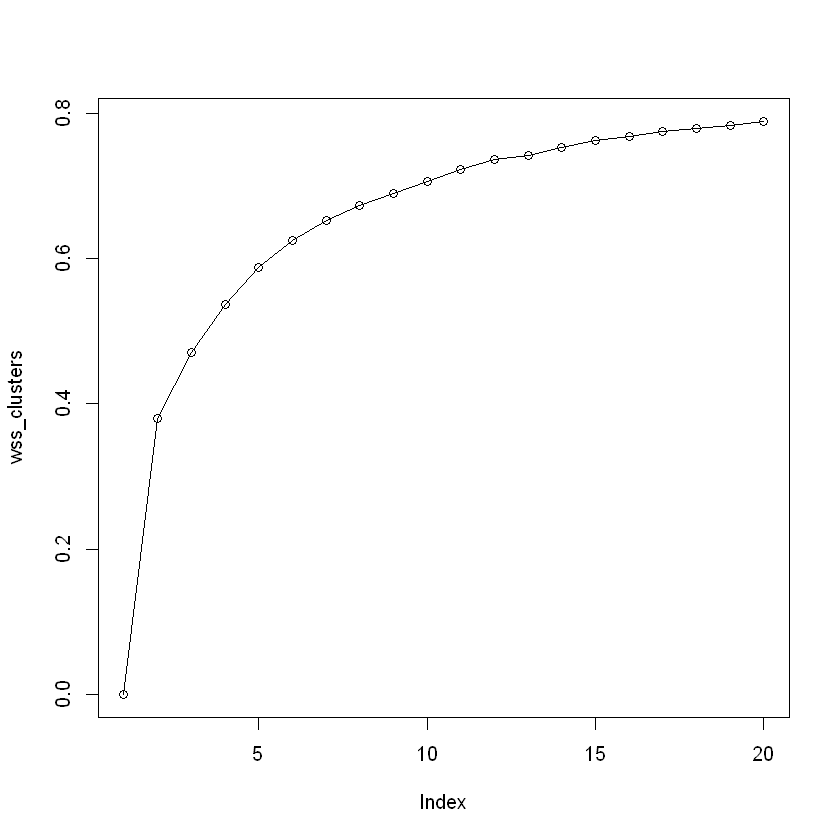

In [86]:
plot(wss_clusters, type="o")

In [103]:
stata_kmeans <- kmeans(bd_stata_to_class@data[, c(-31:-34, -36:-39)], 12, nstart = 5, iter.max = 50)

In [104]:
round(stata_kmeans$betweenss / stata_kmeans$totss, 2)

[1] 0.73

In [105]:
clusKME13 <- stata_kmeans$cluster
bd_stata_to_class@data <- cbind(bd_stata_to_class@data, clusKME12)

In [108]:
writeOGR(bd_stata, dsn = "bd_stata.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(bd_stata_to_class, dsn = "bd_stata_kmeans.gpkg", layer = 'km12', driver = "GPKG")

### StatB

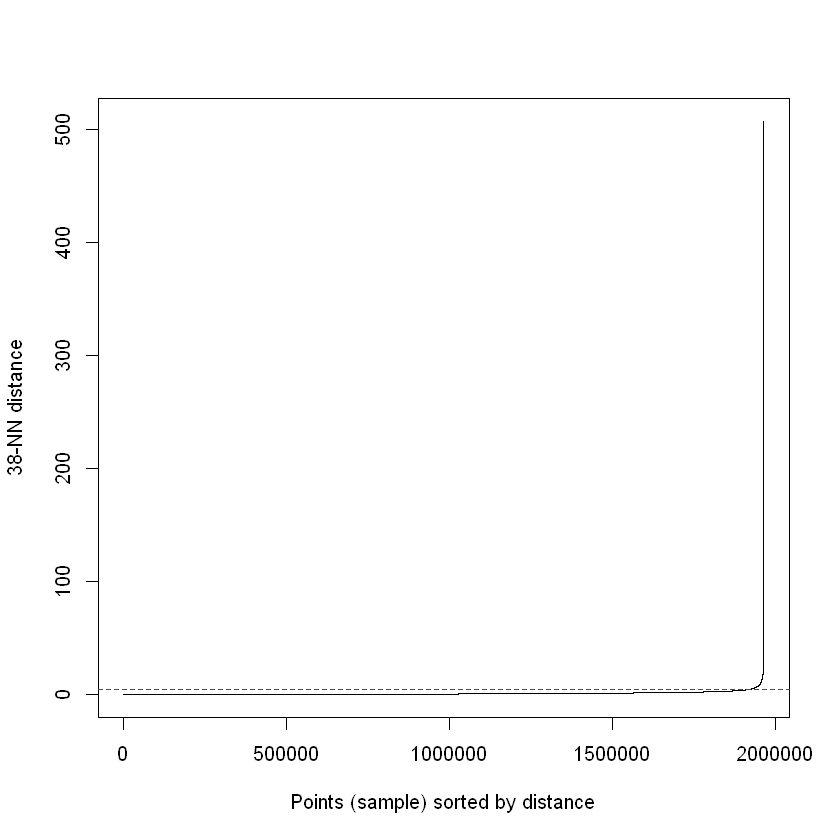

In [6]:
kNNdistplot(bd_statb@data, k = 38)
abline(h = 5, col = 'red', lty = 2)

In [6]:
res_statb <- dbscan(bd_statb@data, eps = 5, minPts = 39)
res_statb

DBSCAN clustering for 51704 objects.
Parameters: eps = 5, minPts = 39
The clustering contains 1 cluster(s) and 777 noise points.

    0     1 
  777 50927 

Available fields: cluster, eps, minPts

In [7]:
clusDBSCAN <- res_statb$cluster
bd_statb@data <- cbind(bd_statb@data, clusDBSCAN)

b_perim,b_area,b_r_vol_fac,b_maxedge,b_minedge,b_stories,b_floorsqm,c_miller,c_schumm,c_haggett,...,sc_orient,sc_l_sn,sc_l_ew,sc_l_nesw,sc_l_senw,m_corndis,m_court,m_court_area,m_court_rel_a,clusDBSCAN
1.6336763,1.1062675,2.12952255,2.00668154,-1.3202569,-0.003323836,0.49873621,-1.7260012,-0.8903350,-1.5885070,...,2.7382284,-0.1489650,-0.04812188,2.44671347,1.95842346,1.61386134,-0.01868091,-0.01232127,-0.02050337,1
-0.6739517,-0.3442559,-1.15728840,-0.92950713,-0.7503876,-0.656767158,-0.23871136,0.6759864,0.7403685,0.9890411,...,-0.4950173,-0.2595827,-0.25232472,-0.32722943,-0.24417929,-0.99883305,-0.01868091,-0.01232127,-0.02050337,1
-0.1014790,-0.1217218,-0.06215268,0.16723154,0.1296646,-0.656767158,-0.16444997,-0.1077806,-0.4508903,-0.8039886,...,-0.4950173,-0.2595827,-0.25232472,0.86288179,-0.31778260,0.08482979,-0.01868091,-0.01232127,-0.02050337,1
0.4815442,0.1415312,0.44840279,-0.01408539,-0.4811763,-0.003323836,0.01582589,-1.4463896,-1.1617179,-1.5341838,...,1.6604799,-0.2595827,0.24565431,1.07588794,0.11697100,0.12012602,-0.01868091,-0.01232127,-0.02050337,1
-0.2739547,-0.1860816,-0.21755598,-0.35730439,0.4396905,-0.656767158,-0.18592735,0.6127674,0.6362937,0.6413997,...,-0.4950173,-0.2595827,-0.25232472,-0.01483144,-0.31778260,-0.30232621,-0.01868091,-0.01232127,-0.02050337,1
-0.4045348,-0.2508048,-0.55640895,-0.47910473,-0.1432210,-0.003323836,-0.18056259,0.4984052,0.4634202,0.2789148,...,-0.4950173,-0.2595827,-0.25232472,-0.32722943,0.08663966,-0.51831859,-0.01868091,-0.01232127,-0.02050337,1


In [8]:
sel <- bd_statb@data$clusDBSCAN == 1
bd_statb_to_class <- bd_statb[sel,]

In [9]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(bd_statb_to_class@data[,c(-31:-34,-36:-39)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2546350)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2546350)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2546350)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2546350)"

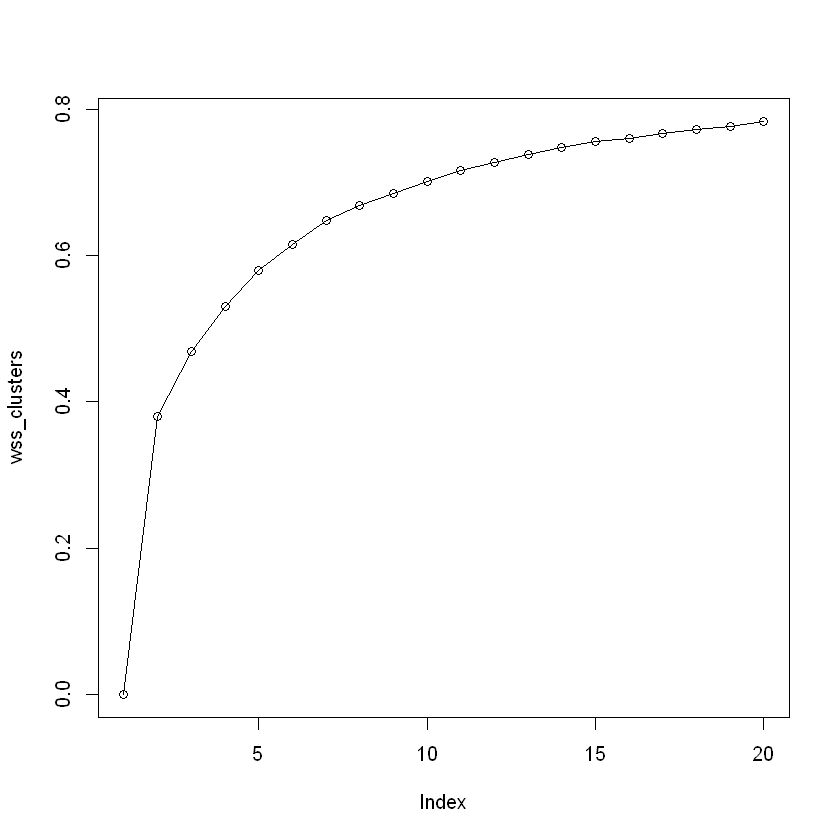

In [10]:
plot(wss_clusters, type="o")

In [11]:
statb_kmeans <- kmeans(bd_statb_to_class@data[, c(-31:-34, -36:-39)], 15, nstart = 5, iter.max = 50)

In [12]:
round(statb_kmeans$betweenss / statb_kmeans$totss, 2)

[1] 0.76

In [14]:
clusKME15 <- statb_kmeans$cluster
bd_statb_to_class@data <- cbind(bd_statb_to_class@data, clusKME15)

In [15]:
writeOGR(bd_statb, dsn = "bd_statb.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(bd_statb_to_class, dsn = "bd_statb_kmeans.gpkg", layer = 'km15', driver = "GPKG")

### Fractal morphology

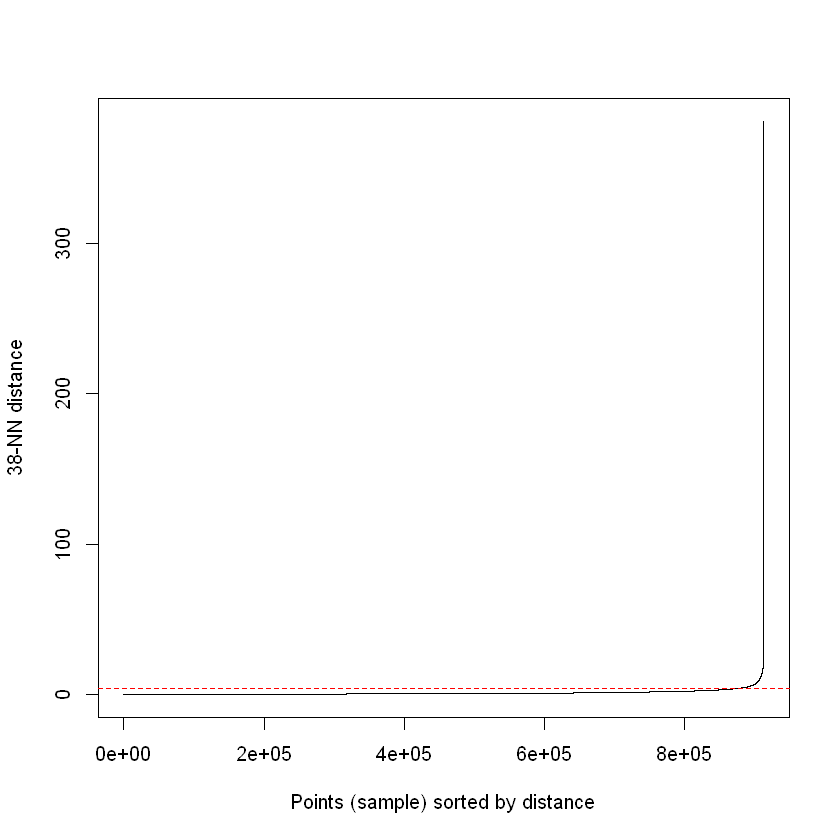

In [36]:
kNNdistplot(bd_morf@data, k = 38)
abline(h = 4, col = 'red', lty = 2)

In [24]:
res_morf <- dbscan(bd_morf@data, eps = 4, minPts = 39)
res_morf

DBSCAN clustering for 24037 objects.
Parameters: eps = 4, minPts = 39
The clustering contains 1 cluster(s) and 794 noise points.

    0     1 
  794 23243 

Available fields: cluster, eps, minPts

In [25]:
clusDBSCAN <- res_morf$cluster
bd_morf@data <- cbind(bd_morf@data, clusDBSCAN)

,b_perim,b_area,b_r_vol_fac,b_maxedge,b_minedge,b_stories,b_floorsqm,c_miller,c_schumm,c_haggett,...,sc_orient,sc_l_sn,sc_l_ew,sc_l_nesw,sc_l_senw,m_corndis,m_court,m_court_area,m_court_rel_a,clusDBSCAN
788,-0.06698971,-0.06854546,0.3041854,-0.12462725,1.3212788,1.9770080,0.06685161,0.6431885,0.69607711,0.8054069,...,-0.4770268,-0.2307193,-0.2334717030,-0.2619333,-0.08345882,0.0294097,-0.02457879,-0.01676117,-0.02739077,1
789,-0.34860507,-0.22273112,-0.4661002,-0.57335133,0.2783125,-0.2418528,-0.18788919,0.6787592,0.74954498,1.0969352,...,-0.4770268,-0.2307193,-0.2334717030,-0.2619333,-0.25966162,-0.5016886,-0.02457879,-0.01676117,-0.02739077,1
790,4.77677063,2.15977903,1.1482361,4.19166256,-1.5969526,2.5317232,2.91190504,-4.6206579,-2.12962797,-2.8817482,...,2.8031183,0.2752511,-0.0009252949,6.1184840,10.00213789,3.5096606,-0.02457879,-0.01676117,-0.02739077,0
791,-0.03433865,-0.06656993,0.2331734,0.14829985,0.6731369,0.8675776,-0.02264712,0.2215963,0.04560627,-0.2870624,...,-0.4770268,-0.2307193,-0.2334717030,-0.2619333,0.48686507,0.1439027,-0.02457879,-0.01676117,-0.02739077,1
792,1.36245437,0.79447178,1.5859670,2.03712975,-0.3426940,4.7505839,1.92083677,-2.1293377,-1.75510248,-2.7318869,...,1.7097366,-0.2307193,0.4851780684,1.6147346,1.85693163,1.9531608,-0.02457879,-0.01676117,-0.02739077,0
793,0.03912623,0.00696096,0.6126418,-0.04168339,1.9851487,1.9770080,0.14985540,0.6790739,0.73763101,1.1010434,...,-0.4770268,-0.2307193,-0.2334717030,-0.1880667,-0.30432751,0.2235372,-0.02457879,-0.01676117,-0.02739077,1


In [26]:
sel <- bd_morf@data$clusDBSCAN == 1
bd_morf_to_class <- bd_morf[sel,]

In [29]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(bd_morf_to_class@data[,c(-31:-34,-36:-39)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1162150)"

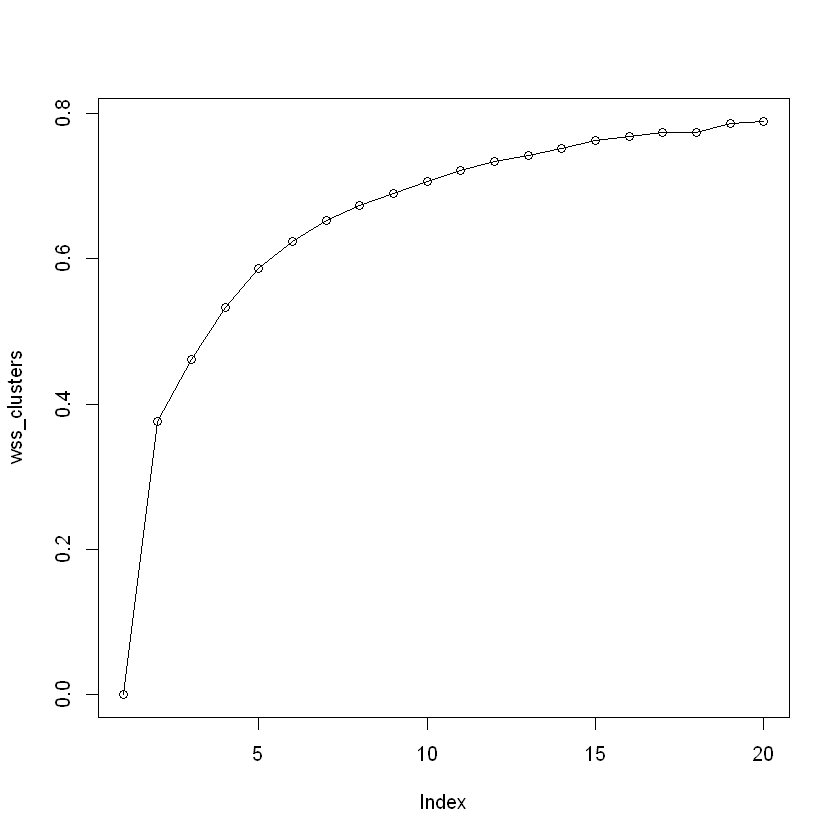

In [30]:
plot(wss_clusters, type="o")

In [33]:
morf_kmeans <- kmeans(bd_morf_to_class@data[, c(-31:-34, -36:-39)], 12, nstart = 5, iter.max = 50)

In [34]:
round(morf_kmeans$betweenss / morf_kmeans$totss, 2)

[1] 0.74

In [35]:
clusKME13 <- morf_kmeans$cluster
bd_morf_to_class@data <- cbind(bd_morf_to_class@data, clusKME13)

In [37]:
writeOGR(bd_morf, dsn = "bd_morf.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(bd_morf_to_class, dsn = "bd_morf_kmeans.gpkg", layer = 'km12', driver = "GPKG")

### CCA King

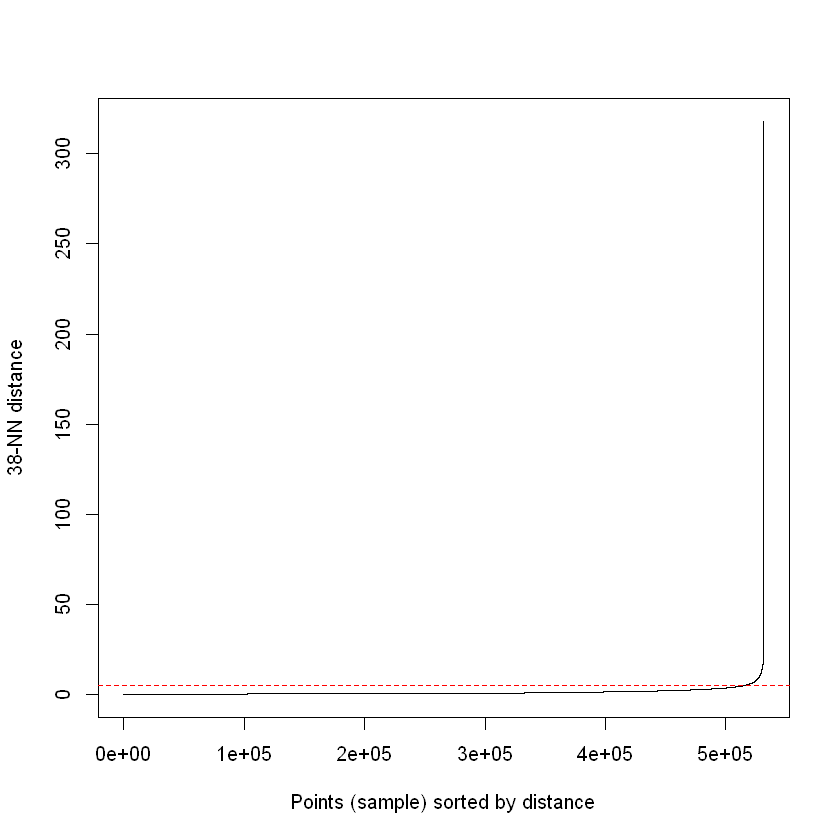

In [40]:
kNNdistplot(bd_ccak@data, k = 38)
abline(h = 5, col = 'red', lty = 2)

In [41]:
res_ccak <- dbscan(bd_ccak@data, eps = 5, minPts = 39)
res_ccak

DBSCAN clustering for 13990 objects.
Parameters: eps = 5, minPts = 39
The clustering contains 1 cluster(s) and 321 noise points.

    0     1 
  321 13669 

Available fields: cluster, eps, minPts

In [42]:
clusDBSCAN <- res_ccak$cluster
bd_ccak@data <- cbind(bd_ccak@data, clusDBSCAN)

,b_perim,b_area,b_r_vol_fac,b_maxedge,b_minedge,b_stories,b_floorsqm,c_miller,c_schumm,c_haggett,...,sc_orient,sc_l_sn,sc_l_ew,sc_l_nesw,sc_l_senw,m_corndis,m_court,m_court_area,m_court_rel_a,clusDBSCAN
788,-0.10538068,-0.09102727,0.2138043,-0.19687918,1.2152285,1.562440,0.004581605,0.6466792,0.70024202,0.811064,...,-0.4621199,-0.2205559,-0.21718508,-0.2401628,-0.1077653,-0.06134414,-0.02621136,-0.01954041,-0.03080047,1
789,-0.34448782,-0.22391820,-0.5382248,-0.61122861,0.1983877,-0.457524,-0.208810627,0.6806584,0.75030115,1.090907,...,-0.4621199,-0.2205559,-0.21718508,-0.2401628,-0.2590453,-0.54965627,-0.02621136,-0.01954041,-0.03080047,1
790,4.00724170,1.82954103,1.0378501,3.78875984,-1.6299032,2.067431,2.387836725,-4.3816589,-1.94531571,-2.728296,...,2.8285439,0.1936505,-0.02785125,5.5129687,8.5512854,3.13853203,-0.02621136,-0.01954041,-0.03080047,0
791,-0.07765811,-0.08932458,0.1444754,0.05514024,0.5833220,0.552458,-0.070390030,0.2439493,0.09124069,-0.237615,...,-0.4621199,-0.2205559,-0.21718508,-0.2401628,0.3818898,0.04392508,-0.02621136,-0.01954041,-0.03080047,1
792,1.10829698,0.65279777,1.4652064,1.79927572,-0.4070629,4.087395,1.557634909,-2.0018022,-1.59466736,-2.584442,...,1.7316560,-0.2205559,0.36792271,1.4520019,1.5581688,1.70742635,-0.02621136,-0.01954041,-0.03080047,1
793,-0.01528234,-0.02594913,0.5149500,-0.12028927,1.8624688,1.562440,0.074112540,0.6809591,0.73914673,1.094850,...,-0.4621199,-0.2205559,-0.21718508,-0.1735584,-0.2973935,0.11714417,-0.02621136,-0.01954041,-0.03080047,1


In [43]:
sel <- bd_ccak@data$clusDBSCAN == 1
bd_ccak_to_class <- bd_ccak[sel,]

In [44]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(bd_ccak_to_class@data[,c(-31:-34,-36:-39)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 683450)"

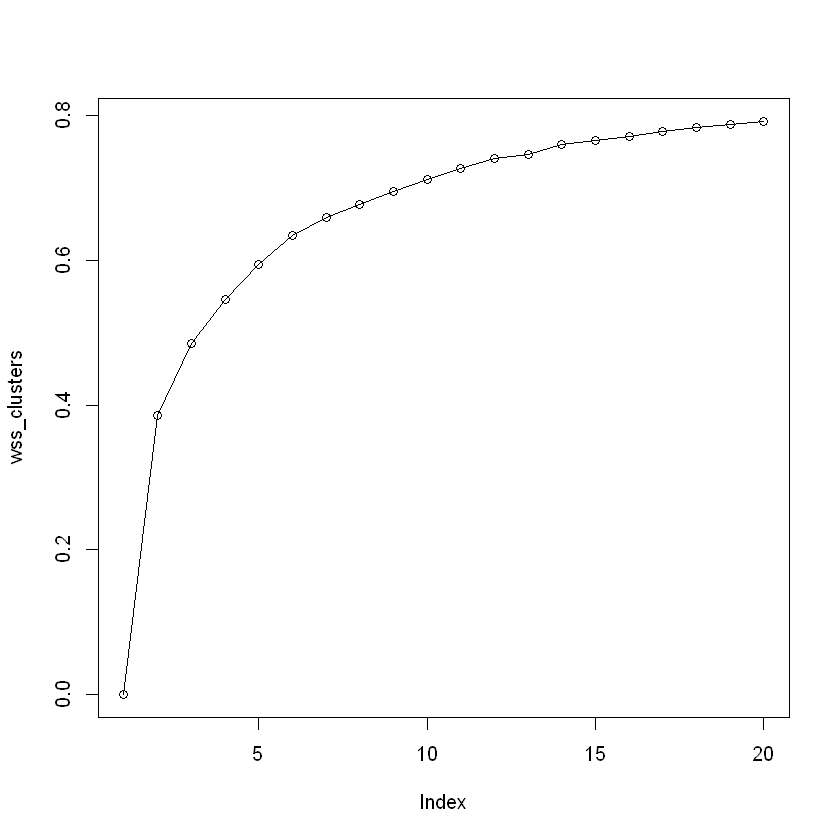

In [45]:
plot(wss_clusters, type="o")

In [46]:
ccak_kmeans <- kmeans(bd_ccak_to_class@data[, c(-31:-34, -36:-39)], 12, nstart = 5, iter.max = 50)

In [47]:
round(ccak_kmeans$betweenss / ccak_kmeans$totss, 2)

[1] 0.74

In [48]:
clusKME12 <- ccak_kmeans$cluster
bd_ccak_to_class@data <- cbind(bd_ccak_to_class@data, clusKME12)

In [49]:
writeOGR(bd_ccak, dsn = "bd_ccak.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(bd_ccak_to_class, dsn = "bd_ccak_kmeans.gpkg", layer = 'km12', driver = "GPKG")

### CCA Lenient

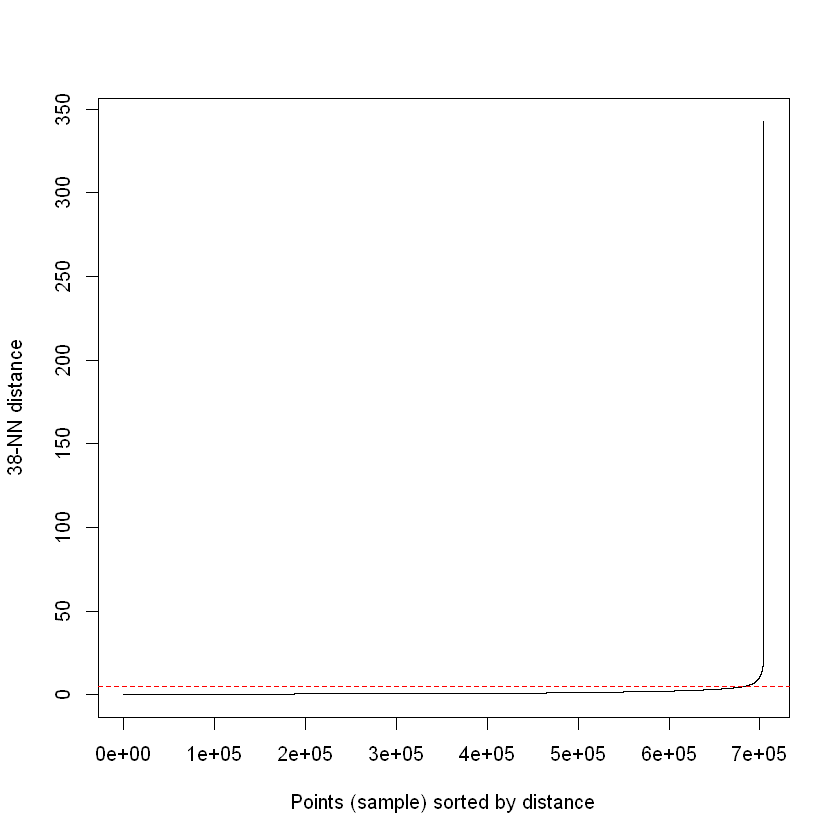

In [6]:
kNNdistplot(bd_ccal@data, k = 38)
abline(h = 5, col = 'red', lty = 2)

In [7]:
res_ccal <- dbscan(bd_ccal@data, eps = 5, minPts = 39)
res_ccal

DBSCAN clustering for 18538 objects.
Parameters: eps = 5, minPts = 39
The clustering contains 1 cluster(s) and 415 noise points.

    0     1 
  415 18123 

Available fields: cluster, eps, minPts

In [8]:
clusDBSCAN <- res_ccal$cluster
bd_ccal@data <- cbind(bd_ccal@data, clusDBSCAN)

,b_perim,b_area,b_r_vol_fac,b_maxedge,b_minedge,b_stories,b_floorsqm,c_miller,c_schumm,c_haggett,...,sc_orient,sc_l_sn,sc_l_ew,sc_l_nesw,sc_l_senw,m_corndis,m_court,m_court_area,m_court_rel_a,clusDBSCAN
788,-0.09829562,-0.08906542,0.2311050,-0.17274391,1.2675685,1.7648907,0.02608336,0.6537138,0.70974906,0.8229722,...,-0.4776269,-0.2283326,-0.22531352,-0.2606365,-0.1027775,-0.03133972,-0.02672204,-0.01886185,-0.03021632,1
789,-0.35456210,-0.22779448,-0.5035347,-0.59818135,0.2409455,-0.3407563,-0.20090401,0.6883230,0.76159682,1.1089579,...,-0.4776269,-0.2283326,-0.22531352,-0.2606365,-0.2627573,-0.53188487,-0.02672204,-0.01886185,-0.03021632,1
790,4.30946598,1.91587686,1.0360961,3.91955100,-1.6049341,2.2913025,2.56117466,-4.4678418,-2.03033513,-2.7940820,...,2.7808056,0.2276312,-0.01476496,5.5531714,9.0542366,3.24869859,-0.02672204,-0.01886185,-0.03021632,0
791,-0.06858356,-0.08728793,0.1633791,0.08601957,0.6295830,0.7120672,-0.05366469,0.2435179,0.07898796,-0.2487268,...,-0.4776269,-0.2283326,-0.22531352,-0.2606365,0.4150366,0.07656667,-0.02672204,-0.01886185,-0.03021632,1
792,1.20248070,0.68743718,1.4535705,1.87682818,-0.3703297,4.3969495,1.67808104,-2.0438663,-1.66715803,-2.6470699,...,1.6946614,-0.2283326,0.42535519,1.4493749,1.6589609,1.78174137,-0.02672204,-0.01886185,-0.03021632,1
793,-0.00173144,-0.02112827,0.5252871,-0.09410444,1.9210355,1.7648907,0.10004408,0.6886292,0.75004385,1.1129881,...,-0.4776269,-0.2283326,-0.22531352,-0.1933296,-0.3033107,0.15162001,-0.02672204,-0.01886185,-0.03021632,1


In [9]:
sel <- bd_ccal@data$clusDBSCAN == 1
bd_ccal_to_class <- bd_ccal[sel,]

In [10]:
wss_clusters = seq(1, 20)
for (i in 1:20) {
    c = kmeans(bd_ccal_to_class@data[,c(-31:-34,-36:-39)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

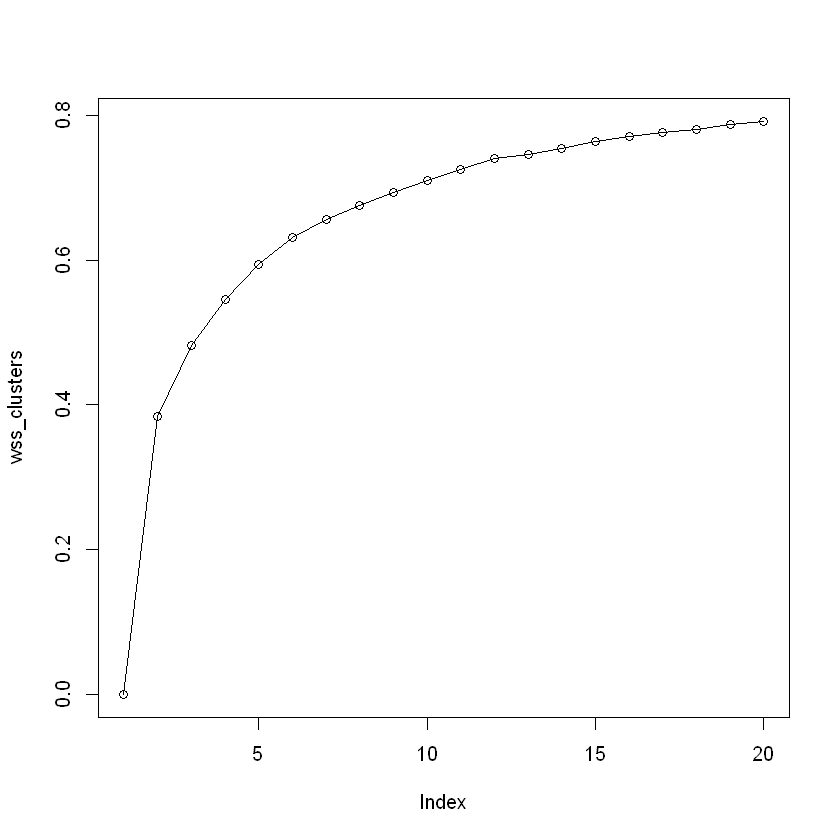

In [11]:
plot(wss_clusters, type="o")

In [14]:
ccal_kmeans <- kmeans(bd_ccal_to_class@data[, c(-31:-34, -36:-39)], 12, nstart = 5, iter.max = 50)

In [15]:
round(ccal_kmeans$betweenss / ccal_kmeans$totss, 2)

[1] 0.74

In [16]:
clusKME13 <- ccal_kmeans$cluster
bd_ccal_to_class@data <- cbind(bd_ccal_to_class@data, clusKME13)

In [17]:
writeOGR(bd_ccal, dsn = "bd_ccal.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(bd_ccal_to_class, dsn = "bd_ccal_kmeans.gpkg", layer = 'km12', driver = "GPKG")